In [1]:
from google.colab import drive
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import make_circles

In [4]:
file_path = '/content/drive/My Drive/CVX/age_salary.csv'

age_salary = pd.read_csv(file_path)

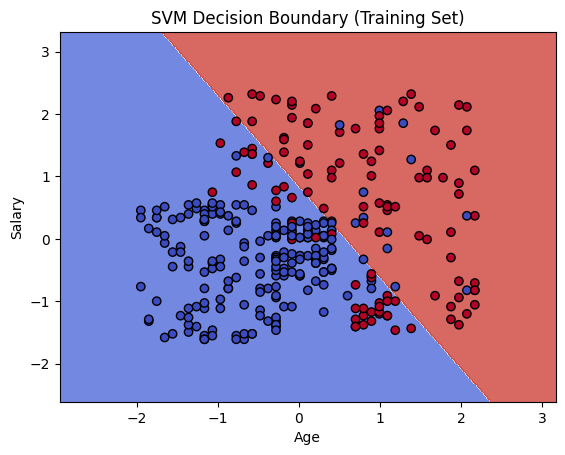

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [5]:
# Selecting features (age and salary) and target variable
X = age_salary[['Age', 'EstimatedSalary']]
y = age_salary['Purchased']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: SVM Training
# Training an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Step 3: Visualization
# Visualizing the decision boundary along with support vectors
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, svm_classifier, 'SVM Decision Boundary (Training Set)')

# Step 4: Model Evaluation
# Evaluate the model on the testing set
y_pred = svm_classifier.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

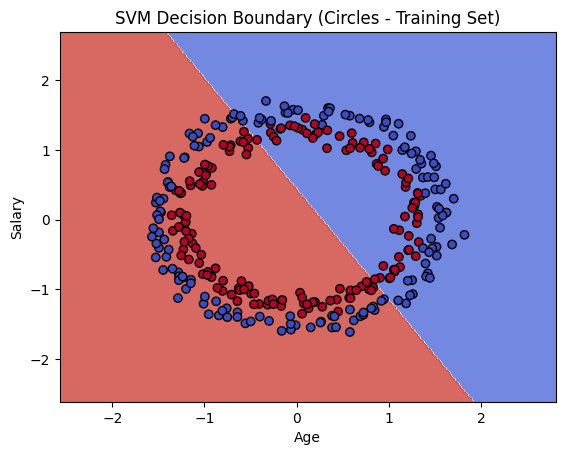

Classification Report (Circles Dataset):
               precision    recall  f1-score   support

           0       0.48      0.48      0.48        42
           1       0.42      0.42      0.42        38

    accuracy                           0.45        80
   macro avg       0.45      0.45      0.45        80
weighted avg       0.45      0.45      0.45        80



In [6]:
# Step 5: Reset using make_circles dataset
# Create a dataset with make_circles
X_circles, y_circles = make_circles(n_samples=400, noise=0.05, random_state=42)

# Splitting the dataset into training and testing sets
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)

# Scaling the data
scaler_circles = StandardScaler()
X_train_scaled_circles = scaler_circles.fit_transform(X_train_circles)
X_test_scaled_circles = scaler_circles.transform(X_test_circles)

# Training an SVM classifier with a linear kernel on circles dataset
svm_classifier_circles = SVC(kernel='linear')
svm_classifier_circles.fit(X_train_scaled_circles, y_train_circles)

# Visualizing the decision boundary along with support vectors for circles dataset
plot_decision_boundary(X_train_scaled_circles, y_train_circles, svm_classifier_circles, 'SVM Decision Boundary (Circles - Training Set)')

# Evaluate the model on the testing set for circles dataset
y_pred_circles = svm_classifier_circles.predict(X_test_scaled_circles)
print("Classification Report (Circles Dataset):\n", classification_report(y_test_circles, y_pred_circles))

As observed by the low accuracy and also visualization of the decision boundary, linear SVM is not a good option for classifying circle data. A nonlinear SVM must be used for this task with such data.